## **About Dataset**

**Context**

The dataset is from the U.S. Small Business Administration (SBA)

The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

Small business owners often seek out SBA (Small Business Association) loans because they guarantee part of the loan. Without going into too much detail, this basically means that the SBA will cover some of the losses should the business default on the loan, which lowers the risk involved for the business owner(s). This increases the risk to the SBA however, which can sometimes make it difficult to get accepted for one of their loan program.

**Content**

Shape of the data: 899164 rows and 27 columns

## **About Project**

This is my first project to fulfill assigned tasks from Bootcamp Data Science Dibimbing Batch 17. I got this dataset from kaggle and so much inspired by Kevin Miller and Aldito Patriza who have succesfully completed the project.



# Importing Libraries and Data

In [ ]:
#importing basic library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dibimbing Bootcamp Data Science/loan.csv')

<ipython-input-3-ab003d4b6a51>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Dibimbing Bootcamp Data Science/loan.csv')


In [ ]:
df.shape

(899164, 27)

In [ ]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

# Data Cleaning

In [ ]:
#Checking for duplicate
df.duplicated().sum()

0

Duplicated value is not indentified in the dataset

In [ ]:
#Checking for missing values
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

All features that contain missing value has small percentage to the whole data (<1%), except 'ChgOffDate' (>80%). So we will drop the missing values and the 'ChgOffDate' column.

In [ ]:
#Drop Missing Value
df.dropna(subset=['Name', 'City', 'State', 'BankState', 'NewExist','RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'], inplace=True)
df.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           725369
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
#Drop Column 'ChgOffDate'
df.drop(columns=['ChgOffDate'], inplace=True)

The dataset has cleaned from duplicate and missing value. Now lets check the data type compatibility.

# Data Type Compatibility

In [ ]:
# Check data types of each feature
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

First, I will change the data type of 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv' which should be integer instead of object. This is because the data come with $. 

In [ ]:
# Remove '$', commas, and extra spaces from records in columns with dollar values that should be floats
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']] = \
df[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].applymap(lambda x: x.strip().replace('$', '').replace(',', ''))

Second, lets we change data type of 'ApprovalFY' which should be an integer but is coming up as an object type because there's a mixture of integers and strings here, with one record including an 'A' as well.

In [ ]:
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

In [ ]:
# Create a function to apply formatting to the records of str type only
def clean_str(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x


df['ApprovalFY'] = df['ApprovalFY'].apply(clean_str).astype('int64')

Lets fix others column data type

In [ ]:
# Change the type of NewExist to an integer, Zip and UrbanRural to str (categorical) and all currency-related fields to float values
df = df.astype({'Zip': 'str', 'NewExist': 'int64', 'UrbanRural': 'str', 'DisbursementGross': 'float', 'BalanceGross': 'float',
                          'ChgOffPrinGr': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

# Convert ApprovalDate and DisbursementDate columns to datetime values
df[['ApprovalDate', 'DisbursementDate']] = df[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

# Recheck data type
df.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                          object
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                    int64
Term                          int64
NoEmp                         int64
NewExist                      int64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                   object
RevLineCr                    object
LowDoc                       object
DisbursementDate     datetime64[ns]
DisbursementGross           float64
BalanceGross                float64
MIS_Status                   object
ChgOffPrinGr                float64
GrAppv                      float64
SBA_Appv                    float64
dtype: object

# Data Manipulation

Lets convert the data of 'NAICS' from code number to the name of industry

In [ ]:
# Create a new column with the industry the NAICS code represents
# Selects only the first two numbers of the NAICS code
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

# Maps the approprate industry to each record based on the first two digits of the NAICS code
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

# Remove records where Industry is NaN (NAICS code was a 0)
df.dropna(subset=['Industry'], inplace=True)

Next, we use boolean to encode whether the business is franchise or not.

In [ ]:
# Create feature IsFranchise from FranchiseCode column
df.loc[(df['FranchiseCode'] <= 1), 'IsFranchise'] = 0
df.loc[(df['FranchiseCode'] > 1), 'IsFranchise'] = 1

Next lets look at some of the fields that are considered flags already but aren't necessarily in a useable format right now. These include the NewExist, RevLineCr, LowDoc, and MIS_Status fields.

In [ ]:
# NewExist
df['NewExist'].unique()

array([2, 1, 0])

In [ ]:
# Keep records where NewExist == 1 or 2
df = df[(df['NewExist'] == 1) | (df['NewExist'] == 2)]

# Create NewBusiness field where 0 = Existing business and 1 = New business; based on NewExist field
df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0
df.loc[(df['NewExist'] == 2), 'NewBusiness'] = 1

<ipython-input-19-54ca9f8cacd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['NewExist'] == 1), 'NewBusiness'] = 0


In [ ]:
# RevLineCr and LowDoc
df['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [ ]:
df['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [ ]:
# Remove records where RevLineCr != 'Y' or 'N' and LowDoc != 'Y' or 'N'
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N')]
df = df[(df['LowDoc'] == 'Y') | (df['LowDoc'] == 'N')]

# RevLineCr and LowDoc: 0 = No, 1 = Yes
df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)
df['LowDoc'] = np.where(df['LowDoc'] == 'N', 0, 1)

<ipython-input-22-6d6ae749cc04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RevLineCr'] = np.where(df['RevLineCr'] == 'N', 0, 1)


In [ ]:
# MIS_Status
# Make Default target field based on MIS_Status where P I F = 0 and CHGOFF = 1 so we can see what features are prevalant in a defaulted loan
df['Default'] = np.where(df['MIS_Status'] == 'P I F', 0, 1)
df['Default'].value_counts()

0    358558
1     98382
Name: Default, dtype: int64

One metric that would be interesting to see is the number of days it took from the approval of the loan to the actual disbursement of the funds. The hypothesis is the longer it took to receive funds, the more difficult it would be to pay off the loan. In my experience as a Credit Analyst, there were a number of businesses that needed loan funding urgently to help the business stay afloat. I'm sure this would vary by industry however.

In [ ]:
# Create DaysToDisbursement column which calculates the number of days passed between DisbursementDate and ApprovalDate
df['DaysToDisbursement'] = df['DisbursementDate'] - df['ApprovalDate']

# Change DaysToDisbursement from a timedelta64 dtype to an int64 dtype
# Converts series to str, removes all characters after the space before 'd' in days for each record, then changes the dtype to int
df['DaysToDisbursement'] = df['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d') - 1]).astype('int64')

In [ ]:
# Create DisbursementFY field for time selection criteria later
df['DisbursementFY'] = df['DisbursementDate'].map(lambda x: x.year)

It would be more difficult to service a loan for a business in another state and that this could have a negative impact on a business's ability to repay the loan.

In [ ]:
# Create StateSame flag field which identifies where the business State is the same as the BankState
df['StateSame'] = np.where(df['State'] == df['BankState'], 1, 0)

In [ ]:
# Create SBA_AppvPct field since the guaranteed amount is based on a percentage of the gross loan amount rather than dollar amount in most situations
df['SBA_AppvPct'] = df['SBA_Appv'] / df['GrAppv']

Let's make sure the data types are still correct.

In [ ]:
# Format dtypes where necessary after feature engineering
df = df.astype({'IsFranchise': 'int64', 'NewBusiness': 'int64'})
df.dtypes

LoanNr_ChkDgt                  int64
Name                          object
City                          object
State                         object
Zip                           object
Bank                          object
BankState                     object
NAICS                          int64
ApprovalDate          datetime64[ns]
ApprovalFY                     int64
Term                           int64
NoEmp                          int64
NewExist                       int64
CreateJob                      int64
RetainedJob                    int64
FranchiseCode                  int64
UrbanRural                    object
RevLineCr                      int64
LowDoc                         int64
DisbursementDate      datetime64[ns]
DisbursementGross            float64
BalanceGross                 float64
MIS_Status                    object
ChgOffPrinGr                 float64
GrAppv                       float64
SBA_Appv                     float64
Industry                      object
I

Now, lets drop the columns that unuseful for our analysis and modelling

In [ ]:
df = df.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'NAICS', 'ApprovalDate', 'NewExist', 'FranchiseCode', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv', 'MIS_Status'])

# Statistical Analysis

In [ ]:
df.describe()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct
count,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000,4.569400e+05,4.569400e+05,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000,456940.000000
mean,2003.020642,93.811706,9.895455,1.896610,4.782175,0.420053,0.054937,1.721617e+05,1.542110e+05,0.031214,0.265061,0.215306,108.578463,2003.063249,0.456872,0.652474
std,5.657087,68.362394,56.807480,16.277406,15.697409,0.493568,0.227858,2.751156e+05,2.613271e+05,0.173896,0.441366,0.411035,190.739346,5.575671,0.498137,0.179334
min,1984.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,1.000000e+03,0.000000,0.000000,0.000000,-3614.000000,1984.000000,0.000000,0.050000
25%,2000.000000,59.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+04,2.500000e+04,0.000000,0.000000,0.000000,26.000000,2000.000000,0.000000,0.500000
50%,2005.000000,84.000000,4.000000,0.000000,1.000000,0.000000,0.000000,7.576350e+04,5.000000e+04,0.000000,0.000000,0.000000,49.000000,2005.000000,0.000000,0.500000
75%,2007.000000,90.000000,9.000000,1.000000,5.000000,1.000000,0.000000,1.920000e+05,1.570000e+05,0.000000,1.000000,0.000000,108.000000,2007.000000,1.000000,0.819209
max,2014.000000,527.000000,9999.000000,5621.000000,4441.000000,1.000000,1.000000,1.144632e+07,5.000000e+06,1.000000,1.000000,1.000000,9132.000000,2028.000000,1.000000,1.000000


This shows some interesting information for the analysis, including:
* The average loan term is ~94 months with a standard deviation of ~69 months, suggesting the loan terms are pretty spread out; Max loan term of 527 months could suggest some outliers in the data
* The average number of employees is about 9.8 with 75% of of businesses having 9 or less employees, suggesting NoEmp is very left skewed; Similar situations for created and retained jobs
* The mean for flag fields essentially shows a percentage, so roughly 42% of loans in the sample are revolving lines of credit and about 6% of loans were a part of the Low Doc program
* Average gross loan disbursement was ~166,000 with 75% of loans being less than 188,000, suggesting left skewness again
* About 77.8% of loans in the sample were paid in full
* Only 3% of businesses were franchised; About 26% of loan applicants were considered new businesses.
* The average days to loan disbursement was 109; The min was -3,614, suggesting at least one error in the data (since that's ~301 years)
* Approximately 45.6% of loans were serviced by banks in the same state as the applying business
* The average percentage of SBA loan guaranteed amount was 65.2%



Lets to remove data with a negative DaysToDisbursement under the assumption that loan funds would not be disbursed until they were approved.

In [ ]:
# Remove records with loans disbursed prior to being approved
df = df[df['DaysToDisbursement'] >= 0]

# Check how many records are left
df.shape

(456523, 20)

# Univariate Analysis

In [ ]:
df.head()

,State,BankState,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,Industry,IsFranchise,NewBusiness,Default,DaysToDisbursement,DisbursementFY,StateSame,SBA_AppvPct
0,IN,OH,1997,84,4,0,0,0,0,1,60000.0,60000.0,Retail_trade,0,1,0,730,1999,0,0.80
1,IN,IN,1997,60,2,0,0,0,0,1,40000.0,40000.0,Accom/Food_serv,0,1,0,92,1997,1,0.80
2,IN,IN,1997,180,7,0,0,0,0,0,287000.0,287000.0,Healthcare/Social_assist,0,0,0,306,1997,1,0.75
5,CT,DE,1997,120,19,0,0,0,0,0,517000.0,517000.0,Manufacturing,0,0,0,122,1997,0,0.75
7,FL,AL,1997,84,1,0,0,0,0,1,45000.0,45000.0,Other_no_pub,0,1,0,487,1998,0,0.80


Lets check the outlier for numeric columns (neither boolean type or object).

In [ ]:
df_outlier = df[['ApprovalFY', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 'GrAppv', 'DaysToDisbursement', 'DisbursementFY']]

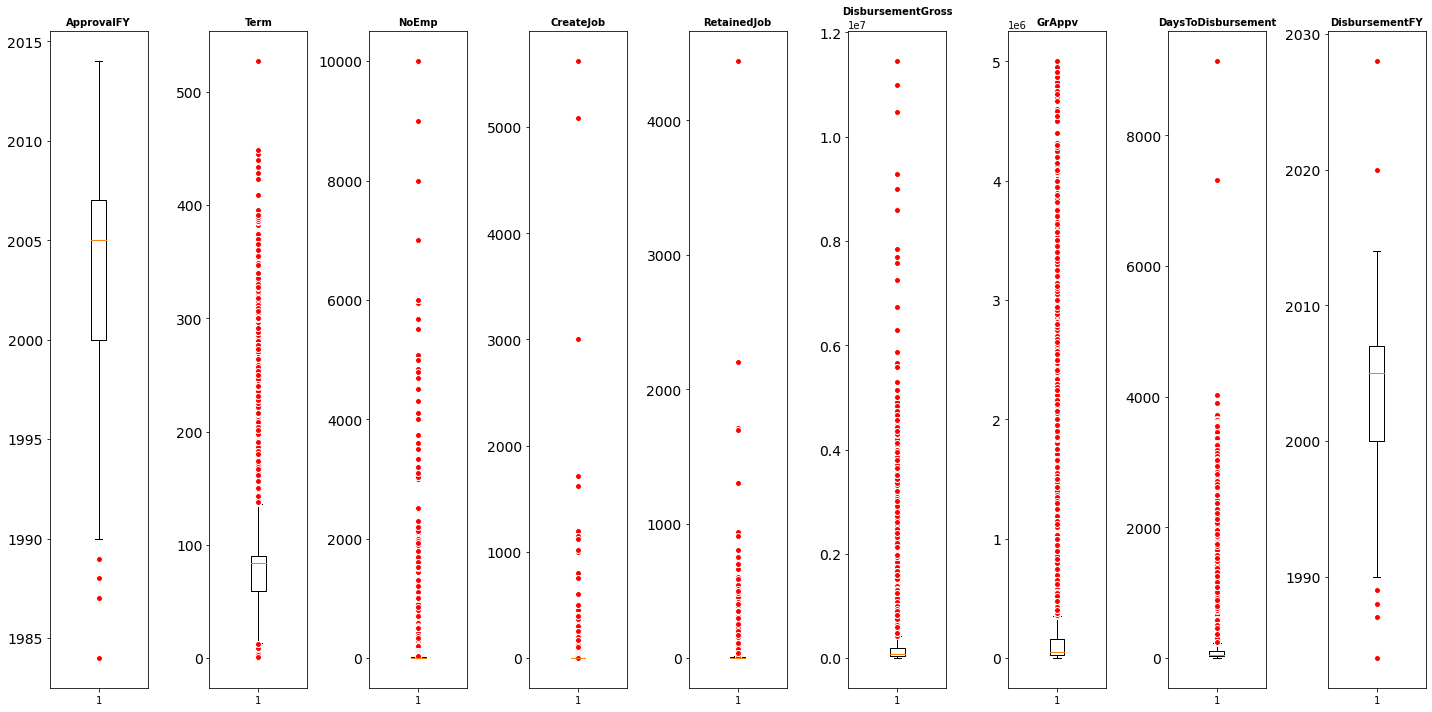

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df_outlier.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_outlier.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_outlier.columns[i], fontsize=10, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

There are so many outliers in all numeric features except 'ApprovalFY' dan 'DisbursementFY'. 

# Multivariate Analysis

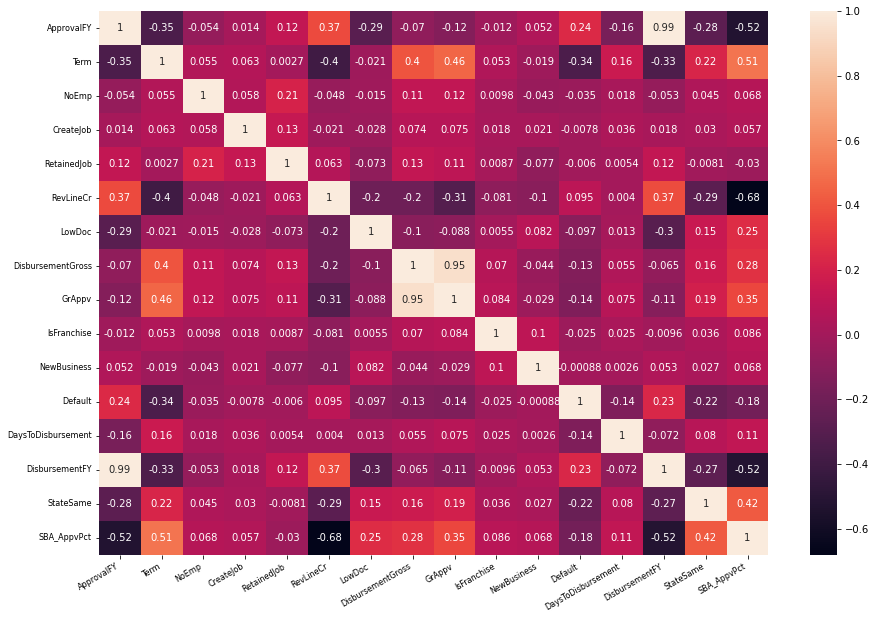

In [ ]:
# Correlation Matrix
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = df.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

There are columns that have strong correlation such as 'GrAppv' - 'DisbursementGross' and 'ApprovalFY' - 'DisbursementFY'. Thats mean that the year of approval and disbursement is mostly same, as well as the gross of approval and disbursement.

# Exploratory Data Analysis




<ipython-input-36-95d31634d7ed>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)
<ipython-input-36-95d31634d7ed>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)
<ipython-input-36-95d31634d7ed>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,


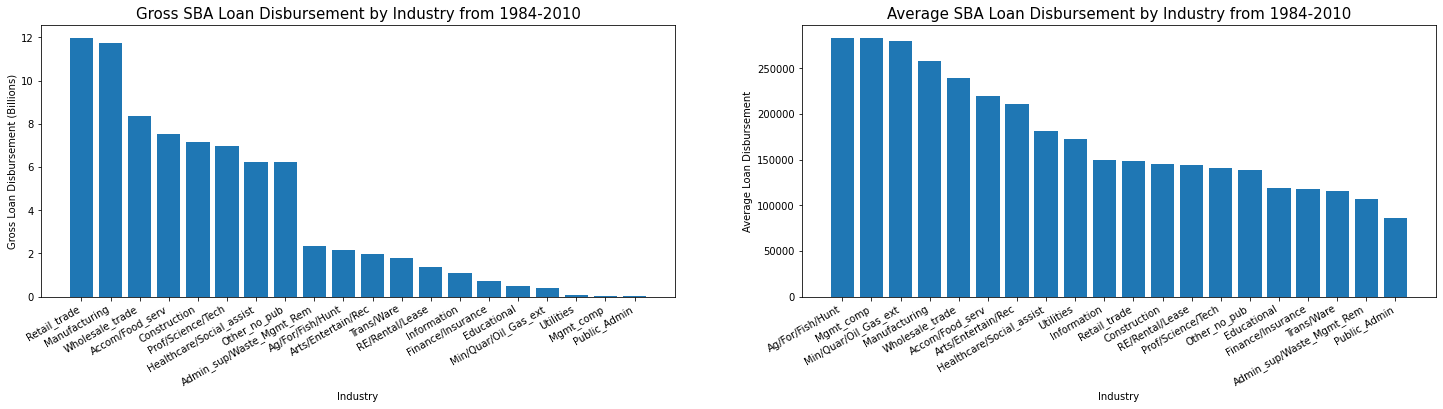

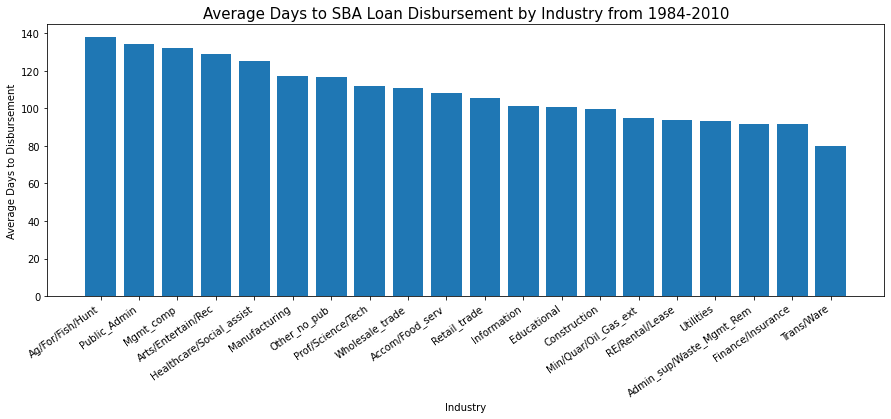

In [ ]:
# Total/Average disbursed loan amount by industry
# Create a groupby object on Industry for use in visualization
industry_group = df.groupby(['Industry'])

# Data frames based on groupby by Industry looking at aggregate and average values
df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

# Establish figure for placing bar charts side-by-side
fig = plt.figure(figsize=(25, 5))

# Add subplots to figure to build 1x2 grid and specify position of each subplot
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Bar chart 1 = Gross SBA Loan Disbursement by Industry
ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# Bar chart 2 = Average SBA Loan Disbursement by Industry
ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Average Loan Disbursement')

# Average days to disbursement by industry
fig2, ax = plt.subplots(figsize=(15, 5))

ax.bar(df_industryAve.index, df_industryAve['DaysToDisbursement'].sort_values(ascending=False))
ax.set_xticklabels(df_industryAve['DaysToDisbursement'].sort_values(ascending=False).index, rotation=35,
                   horizontalalignment='right', fontsize=10)

ax.set_title('Average Days to SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Days to Disbursement')

plt.show()

The graphs tell us that:


1.   Retail trade and Manufacturing industries had significantly more loan funds. 
distributed to them during the sample period compared to other industries
2.   Although the Agriculture, forestry, fishing and hunting, Mining, quarrying, and oil and gas extraction, and Management of companies and enterprises industries had a small amount of total loan funds distributed to them during this time relative to most other industries, they had the highest average loan amount compared to other industries; This suggests they had a small number of large loans.
3. Interestingly, some of the industries with the highest average loan amount also had the highest number of days to disbursement of funds, including the Agriculture, forestry, fishing and hunting, and Management of companies and enterprises industries.






<ipython-input-37-2a70eaf1f6b1>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,


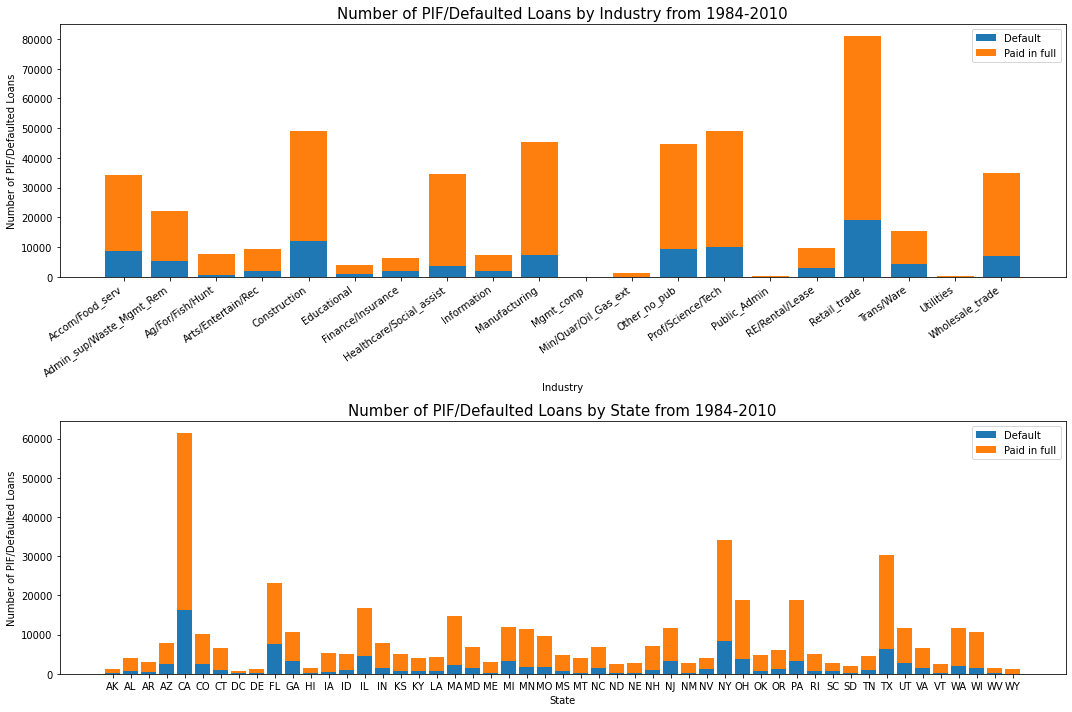

In [ ]:
# Paid in full and defaulted loans
fig3 = plt.figure(figsize=(15, 10))

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

# Function for creating stacked bar charts grouped by desired column
# df = original data frame, col = x-axis grouping, stack_col = column to show stacked values
# Essentially acts as a stacked histogram when stack_col is a flag variable
def stacked_setup(df, col, axes, stack_col='Default'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')


# Number of Paid in full and defaulted loans by industry
stacked_setup(df=df, col='Industry', axes=ax1a)
ax1a.set_xticklabels(df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=15)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# Number of Paid in full and defaulted loans by State
stacked_setup(df=df, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Check Default percentage by Industry
def_ind = df.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])
def_ind

Default,0,1,Def_Percent
Industry,,,
Accom/Food_serv,25678,8558,0.249971
Admin_sup/Waste_Mgmt_Rem,16522,5473,0.248829
Ag/For/Fish/Hunt,6952,669,0.087784
Arts/Entertain/Rec,7307,1950,0.210651
Construction,37006,12179,0.247616
Educational,2914,1087,0.271682
Finance/Insurance,4226,2103,0.332280
Healthcare/Social_assist,30830,3625,0.105210
Information,5503,1843,0.250885


In [ ]:
# Check Default percentage by State
def_state = df.groupby(['State', 'Default'])['State'].count().unstack('Default')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state

Default,0,1,Def_Percent
State,,,
AK,1005,96,0.087193
AL,3294,816,0.198540
AR,2513,534,0.175254
AZ,5435,2503,0.315319
CA,45044,16291,0.265607
CO,7856,2380,0.232513
CT,5500,1073,0.163244
DC,592,158,0.210667
DE,873,249,0.221925


The graphs above tell us:


1.   Industries with the highest number of loans during sample period: Retail trade (78,554), Professional, scientific and technical services (47,081) and Construction (47,047).
2.   Industries with the highest Default percentage: Finance and Insurance (34.4%), Real Estate and rental leasing (33.8%) and Transportation and warehousing (30.7%).
3. States with the highest number of loans during sample period: California (59,121), New York (33,059) and Texas (28,941)
State with the highest Default percentage: Florida (33.8%), Arizona (32.6%) and Nevada (31.6%).





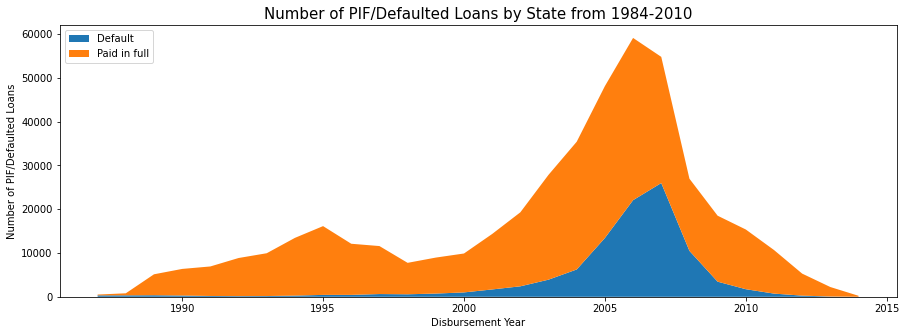

In [ ]:
# Paid in full and Defaulted loans by DisbursementFY
# Decided to use a stacked area chart here since it's time series data
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = df.groupby(['DisbursementFY', 'Default'])['DisbursementFY'].count().unstack('Default')
x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

There is a clear increase in loan volume leading up to the peak of the Great Recession, with a subsequent drop in loan volume immediately following that time. Looking at the graph, it appears the default rate of loans increased during that time as well.

# Build The Model



In [ ]:
# One-hot encode categorical data
df = pd.get_dummies(df)

df.head()

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,GrAppv,IsFranchise,...,Industry_Mgmt_comp,Industry_Min/Quar/Oil_Gas_ext,Industry_Other_no_pub,Industry_Prof/Science/Tech,Industry_Public_Admin,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Utilities,Industry_Wholesale_trade
0,1997,84,4,0,0,0,1,60000.0,60000.0,0,...,0,0,0,0,0,0,1,0,0,0
1,1997,60,2,0,0,0,1,40000.0,40000.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,180,7,0,0,0,0,287000.0,287000.0,0,...,0,0,0,0,0,0,0,0,0,0
5,1997,120,19,0,0,0,0,517000.0,517000.0,0,...,0,0,0,0,0,0,0,0,0,0
7,1997,84,1,0,0,0,1,45000.0,45000.0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Establish target and feature fields
y = df['Default']
X = df.drop('Default', axis=1)

# Scale the feature values prior to modeling
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [ ]:
df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score'
])
models_trained_list = []


def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(X_train, y_train)
    print("Completed {} model training.".format(model_name))
    # Predictions
    y_pred = model.predict(X_test)
    # Add to ith row of dataframe - metrics

    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
    ]
   
    print("Completed {} model's performance assessment.".format(model_name))

In [ ]:
models_list = [LogisticRegression(),
               XGBClassifier()
               ]

In [ ]:
from sklearn.metrics import r2_score,f1_score
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Completed LogisticRegression model's performance assessment.
Training XGBClassifier model...
Completed XGBClassifier model training.
Completed XGBClassifier model's performance assessment.


In [ ]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score
0,LogisticRegression,0.860593,0.859311,0.743701,0.530174,0.619042
1,XGBClassifier,0.961722,0.955621,0.906888,0.885033,0.895827


In [ ]:
models_list2 = [DecisionTreeClassifier(),
               RandomForestClassifier()
               ]

In [ ]:
from sklearn.metrics import r2_score,f1_score
for n, model in enumerate(models_list2):
    get_perf_metrics(model, n)

Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Completed DecisionTreeClassifier model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Completed RandomForestClassifier model's performance assessment.


In [ ]:
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score
0,DecisionTreeClassifier,1.000000,0.933778,0.844856,0.848702,0.846775
1,RandomForestClassifier,0.999988,0.946264,0.922205,0.819929,0.868065


In [ ]:
df['Default'].value_counts()

0    358180
1     98343
Name: Default, dtype: int64

The ratio of target column show 78 : 22, we can't do balancing process to remodify the dataset because the difference is very high.

From model evaluation above, we know that the target data is not balance, so we can take out or ignore the accuracy score. XGBoost and Random Forest are the model with high score in precision, recall, and f1 score. But we will choose XGboost (the highest) for the next tuning parameter process.

Text(0.5, 1.0, 'Confusion Matrix - Xgboost')

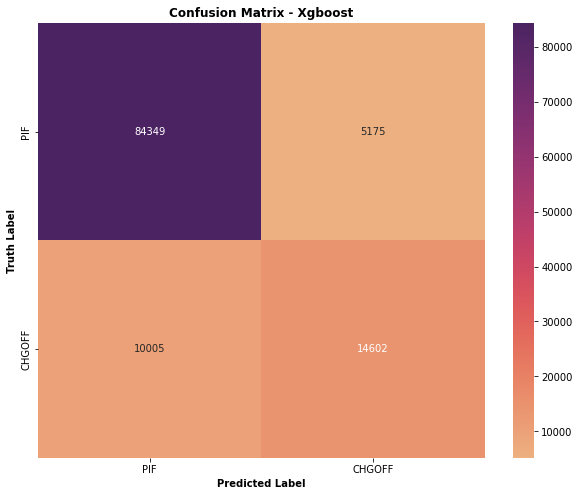

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
x_axis_labels = ['PIF', 'CHGOFF']
y_axis_labels = ['PIF', 'CHGOFF']

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True, 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted Label', fontweight='bold')
plt.ylabel('Truth Label', fontweight='bold')
plt.title('Confusion Matrix - Xgboost', fontweight='bold')

# Model Explanation



We will use importance analysis to show what features have the biggest impact on predictions.

In [ ]:
xgboost = XGBClassifier(random_state=2)

xgboost.fit(X_train, y_train)
y_xgbpred = xgboost.predict(X_test)

# Print the results
print(classification_report(y_test, y_xgbpred, digits=3))

              precision    recall  f1-score   support

           0      0.969     0.975     0.972     89524
           1      0.907     0.885     0.896     24607

    accuracy                          0.956    114131
   macro avg      0.938     0.930     0.934    114131
weighted avg      0.955     0.956     0.955    114131



In [ ]:
# List the importance of each feature
for name, importance in sorted(zip(X.columns, xgboost.feature_importances_)):
    print(name, "=", importance)

ApprovalFY = 0.03634204
BankState_AK = 0.0
BankState_AL = 0.004941873
BankState_AN = 0.0
BankState_AR = 0.0040860684
BankState_AZ = 0.0
BankState_CA = 0.03248335
BankState_CO = 0.0
BankState_CT = 0.0031207525
BankState_DC = 0.0
BankState_DE = 0.03179135
BankState_FL = 0.008785039
BankState_GA = 0.006677281
BankState_GU = 0.0
BankState_HI = 0.0038878014
BankState_IA = 0.003999281
BankState_ID = 0.0017534094
BankState_IL = 0.021566408
BankState_IN = 0.007164296
BankState_KS = 0.0064335912
BankState_KY = 0.00025811844
BankState_LA = 0.0
BankState_MA = 0.00073898
BankState_MD = 0.004498759
BankState_ME = 0.00072993775
BankState_MI = 0.0029701623
BankState_MN = 0.004920809
BankState_MO = 0.003928093
BankState_MS = 0.00624736
BankState_MT = 0.013034752
BankState_NC = 0.049240757
BankState_ND = 0.0017184158
BankState_NE = 0.0014654808
BankState_NH = 0.0
BankState_NJ = 0.0025549242
BankState_NM = 0.001161742
BankState_NV = 0.0019389744
BankState_NY = 0.005224294
BankState_OH = 0.011368314
Bank

In [ ]:
# Build pipeling for feature selection and modeling; SelectKBest defaults to top 10 features
xgb_featimp = XGBClassifier(random_state=2)

pipe = Pipeline(steps=[
    ('feature_selection', SelectKBest()),
    ('model', xgb_featimp)
])

pipe.fit(X_train, y_train)
y_featimppred = pipe.predict(X_test)

print(classification_report(y_test, y_featimppred, digits=3))

              precision    recall  f1-score   support

           0      0.966     0.969     0.967     89524
           1      0.884     0.875     0.880     24607

    accuracy                          0.948    114131
   macro avg      0.925     0.922     0.923    114131
weighted avg      0.948     0.948     0.948    114131



It looks like reducing the number of features, and thereby dimensionality of the data, didn't affect the results too drastically. In fact, this model would likely perform better in a real world test because it is far more generalized. Let's take a look at what features were actually selected then.

In [ ]:
# List the importance of each feature
for name, importance in sorted(zip(X.columns, xgb_featimp.feature_importances_)):
    print(name, "=", importance)

ApprovalFY = 0.13102008
CreateJob = 0.026480757
DisbursementGross = 0.047658574
GrAppv = 0.09509127
IsFranchise = 0.07559523
LowDoc = 0.22293459
NoEmp = 0.017324772
RetainedJob = 0.01678543
RevLineCr = 0.08028162
Term = 0.2868277


After we recheck the model explainability, we can see that Term is the most important feature. Term of a loan is highly related to real estate ownership. Loans with longer term (>= 240 months) are loans backed by real estate, whereas loans with shorter term (<240) are not loans backed by real estate. The ownership of land or real estate is often large enough to cover the amount of any principal outstanding. So this can lead to reduce of the probability of default.